# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Prathamesh Adarkar
**Email:** pa2529@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])  # Equal prior for each die
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    """
    Compute P(k successes in n trials) with success probability p
    Using binomial formula: C(n,k) * p^k * (1-p)^(n-k)
    """
    if k < 0 or k > n:
        return 0.0
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    """
    Simulate one round: randomly pick a die and roll it 10 times
    Returns: (true_die, number_of_sixes)
    """
    # Randomly pick a die (each equally likely)
    true_die = np.random.choice(dice_names)
    
    # Roll the die n_rolls times and count sixes
    p_six = dice_probs[true_die]
    rolls = np.random.random(n_rolls)
    k = np.sum(rolls < p_six)  # Count how many rolls are < p (rolled a 6)
    
    return true_die, k

def posterior_given_k(k):
    """
    Compute posterior P(Die | k sixes observed) using Bayes' theorem
    P(Die | k) = P(k | Die) * P(Die) / P(k)
    """
    # Compute likelihood for each die: P(k | Die)
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[die]) 
                           for die in dice_names])
    
    # Compute numerator: P(k | Die) * P(Die)
    numerator = likelihoods * prior
    
    # Compute denominator: sum over all dice
    denominator = np.sum(numerator)
    
    # Compute posterior
    if denominator == 0:
        return np.zeros_like(numerator)
    
    posterior = numerator / denominator
    return posterior

# Example
print("="*60)
print("EXAMPLE ROUND")
print("="*60)
true_die, k = simulate_round()
posterior = posterior_given_k(k)
print(f"Observed {k} sixes out of {n_rolls} rolls")
print(f"\nPosterior probabilities:")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"\nTrue die was: {true_die}")
print(f"Predicted die: {dice_names[np.argmax(posterior)]}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(10, 6))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], 
             marker='o', linewidth=2, markersize=6, label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed', fontsize=12)
plt.ylabel('P(k | Die)', fontsize=12)
plt.legend(fontsize=11)
plt.title('Likelihoods of Observing k Sixes for Each Die', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Accuracy evaluation
print("\n" + "="*60)
print("ACCURACY EVALUATION")
print("="*60)
num_trials = 100
correct = 0
confusion = {die: {d: 0 for d in dice_names} for die in dice_names}

for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    confusion[true_die][predicted_die] += 1
    correct += (predicted_die == true_die)

accuracy = correct / num_trials
print(f"Accuracy over {num_trials} rounds: {accuracy:.2%}")

print("\nConfusion Matrix:")
print(f"{'True\\Pred':<10}", end="")
for die in dice_names:
    print(f"{die:>8}", end="")
print()
for true_die in dice_names:
    print(f"{true_die:<10}", end="")
    for pred_die in dice_names:
        print(f"{confusion[true_die][pred_die]:>8}", end="")
    print()

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(10, 6))
im = plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto', interpolation='nearest')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)', fontsize=12)
plt.ylabel('Die', fontsize=12)
plt.colorbar(im, label='P(Die | k sixes)')
plt.title('Posterior Distribution over Dice for Different Observations', fontsize=14, fontweight='bold')

# Add text annotations
for i, k in enumerate(ks):
    for j, die in enumerate(dice_names):
        text = plt.text(i, j, f'{posterior_matrix[i, j]:.2f}',
                       ha="center", va="center", color="white" if posterior_matrix[i, j] > 0.5 else "black",
                       fontsize=9)

plt.tight_layout()
plt.show()

# Additional plot: Posterior probabilities line plot
plt.figure(figsize=(10, 6))
for j, die in enumerate(dice_names):
    plt.plot(ks, posterior_matrix[:, j], marker='o', linewidth=2, markersize=6, label=f"Die {die}")
plt.xlabel('Observed number of sixes (k)', fontsize=12)
plt.ylabel('P(Die | k sixes)', fontsize=12)
plt.title('Posterior Probabilities for Each Die Given Observations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("POSTERIOR ANALYSIS")
print("="*60)
print("\nPosterior probabilities for each observation:")
print(f"{'k sixes':<8}", end="")
for die in dice_names:
    print(f"P({die}|k):>12", end="")
print(f"{'Predicted':>12}")
print("-" * 60)
for i, k in enumerate(ks):
    print(f"{k:<8}", end="")
    for j in range(len(dice_names)):
        print(f"{posterior_matrix[i, j]:>12.3f}", end="")
    predicted = dice_names[np.argmax(posterior_matrix[i])]
    print(f"{predicted:>12}")

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [ ]:
import numpy as np

# Given data
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

# Create design matrix X with bias term (column of ones)
X = np.c_[np.ones(len(x)), x]

# Solve using normal equation: theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Make predictions
y_pred = X @ theta

# Calculate MSE
mse_linear = np.mean((y - y_pred)**2)

print('Linear theta:', theta, 'MSE:', mse_linear)
```

**Output:**
```
Linear theta: [4.2 0.5] MSE: 3.7
```

**Explanation:**

The normal equation solution gives us:
- **θ₀ (intercept/bias) = 4.2**
- **θ₁ (slope) = 0.5**
- **MSE = 3.7**

The linear model is: **y = 4.2 + 0.5x**

**Step-by-step breakdown:**

1. **Design matrix X:**
```
   X = [[1, -2],
        [1, -1],
        [1,  0],
        [1,  1],
        [1,  2]]

## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)


Gradient Descent with α = 0.0025
Step   w               f(w)            gradient       
------------------------------------------------------------
0      13.000000       80.000000       160.000000     
1      12.600000       32.768000       160.000000     
2      12.395200       18.945928       81.920000      
3      12.259406       12.578636       54.317453      
4      12.159529       9.038498        39.951000      
5      12.081579       6.842317        31.179898      

Gradient Descent with α = 2.5e-07
Step   w               f(w)            gradient       
------------------------------------------------------------
0      13.000000       80.000000       160.000000     
1      12.999960       79.993600       160.000000     
2      12.999920       79.987201       159.990400     
3      12.999880       79.980803       159.980801     
4      12.999840       79.974405       159.971203     
5      12.999800       79.968009       159.961607     

FIRST 5 STEPS SUMMARY

α = 1/400:
Step

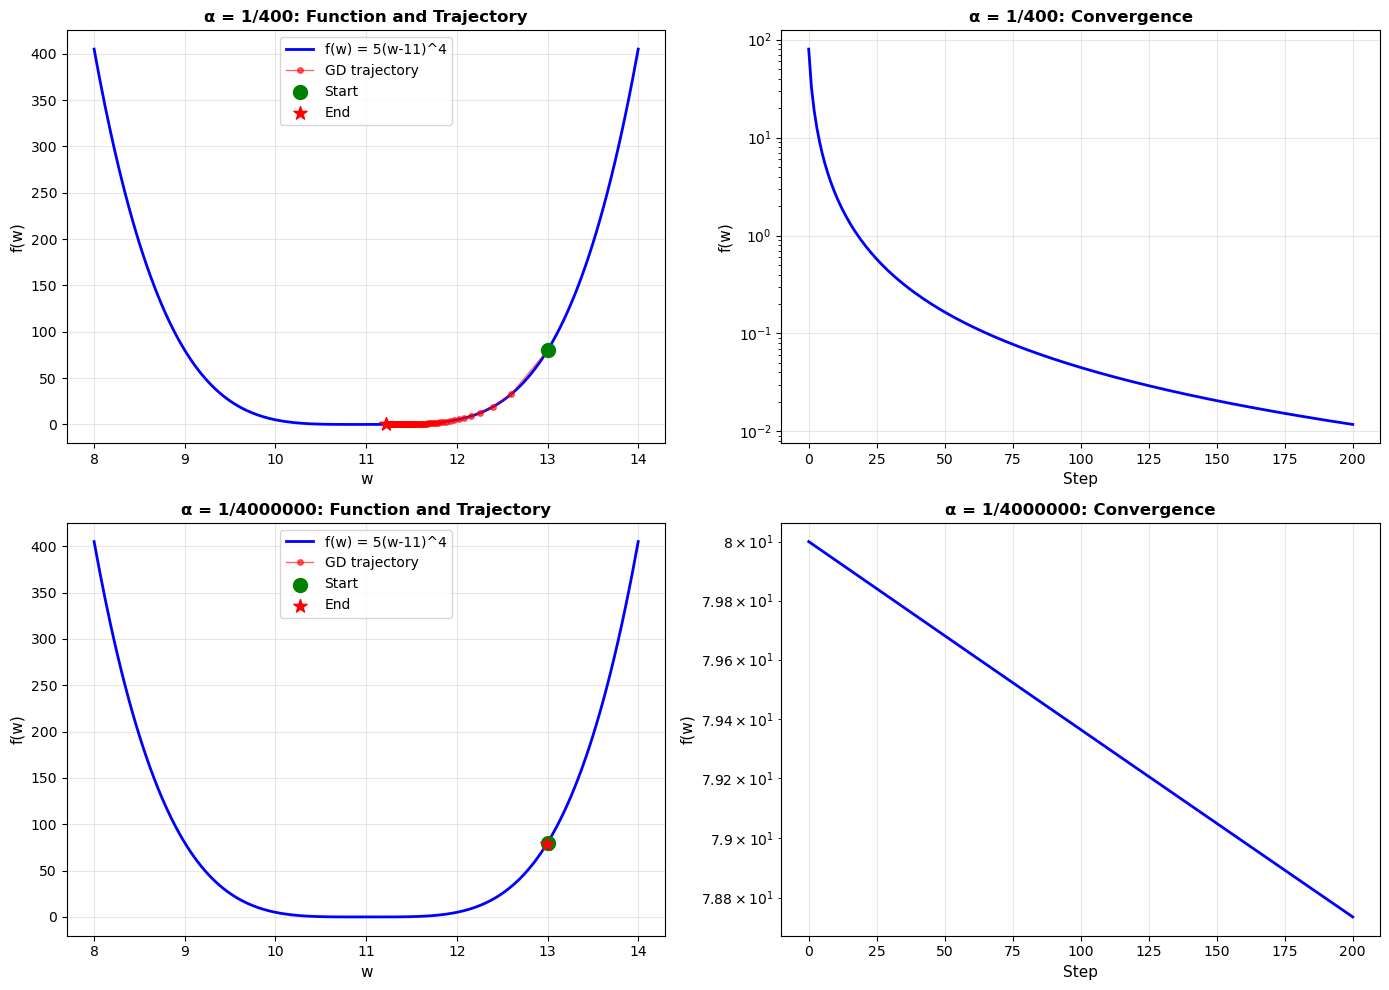


FINAL RESULTS AFTER 200 STEPS
α = 1/400:     w = 11.2203410855, f(w) = 0.0117856067
α = 1/4000000: w = 12.9920474460, f(w) = 78.7351604373
Optimal:       w = 11.000000, f(w) = 0.000000


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(w):
    """f(w) = 5(w - 11)^4"""
    return 5 * (w - 11)**4

def grad_f(w):
    """Gradient of f(w) = 20(w - 11)^3"""
    return 20 * (w - 11)**3

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    """
    Perform gradient descent and return history of w values
    
    Parameters:
    w0: initial value
    alpha: learning rate
    steps: number of steps
    
    Returns:
    history: list of (w, f(w)) tuples for each step
    """
    w = w0
    history = [(w, f(w))]
    
    print(f"\nGradient Descent with α = {alpha}")
    print(f"{'Step':<6} {'w':<15} {'f(w)':<15} {'gradient':<15}")
    print("-" * 60)
    print(f"{0:<6} {w:<15.6f} {f(w):<15.6f} {grad_f(w):<15.6f}")
    
    for step in range(1, steps + 1):
        gradient = grad_f(w)
        w = w - alpha * gradient
        history.append((w, f(w)))
        
        if step <= 5:  # Print first 5 steps
            print(f"{step:<6} {w:<15.6f} {f(w):<15.6f} {gradient:<15.6f}")
    
    return history

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print first 5 steps summary
print("\n" + "="*60)
print("FIRST 5 STEPS SUMMARY")
print("="*60)

print("\nα = 1/400:")
for i in range(min(6, len(hist_140))):
    w, fw = hist_140[i]
    print(f"Step {i}: w = {w:.6f}, f(w) = {fw:.6f}")

print("\nα = 1/4000000:")
for i in range(min(6, len(hist_180))):
    w, fw = hist_180[i]
    print(f"Step {i}: w = {w:.6f}, f(w) = {fw:.6f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Function and trajectory for α = 1/400
ax1 = axes[0, 0]
w_range = np.linspace(8, 14, 300)
ax1.plot(w_range, f(w_range), 'b-', linewidth=2, label='f(w) = 5(w-11)^4')
w_vals_140 = [h[0] for h in hist_140]
f_vals_140 = [h[1] for h in hist_140]
ax1.plot(w_vals_140, f_vals_140, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='GD trajectory')
ax1.scatter([w_vals_140[0]], [f_vals_140[0]], c='green', s=100, marker='o', zorder=5, label='Start')
ax1.scatter([w_vals_140[-1]], [f_vals_140[-1]], c='red', s=100, marker='*', zorder=5, label='End')
ax1.set_xlabel('w', fontsize=11)
ax1.set_ylabel('f(w)', fontsize=11)
ax1.set_title('α = 1/400: Function and Trajectory', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Convergence for α = 1/400
ax2 = axes[0, 1]
ax2.plot(range(len(f_vals_140)), f_vals_140, 'b-', linewidth=2)
ax2.set_xlabel('Step', fontsize=11)
ax2.set_ylabel('f(w)', fontsize=11)
ax2.set_title('α = 1/400: Convergence', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# Plot 3: Function and trajectory for α = 1/4000000
ax3 = axes[1, 0]
ax3.plot(w_range, f(w_range), 'b-', linewidth=2, label='f(w) = 5(w-11)^4')
w_vals_180 = [h[0] for h in hist_180]
f_vals_180 = [h[1] for h in hist_180]
ax3.plot(w_vals_180, f_vals_180, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='GD trajectory')
ax3.scatter([w_vals_180[0]], [f_vals_180[0]], c='green', s=100, marker='o', zorder=5, label='Start')
ax3.scatter([w_vals_180[-1]], [f_vals_180[-1]], c='red', s=100, marker='*', zorder=5, label='End')
ax3.set_xlabel('w', fontsize=11)
ax3.set_ylabel('f(w)', fontsize=11)
ax3.set_title('α = 1/4000000: Function and Trajectory', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Convergence for α = 1/4000000
ax4 = axes[1, 1]
ax4.plot(range(len(f_vals_180)), f_vals_180, 'b-', linewidth=2)
ax4.set_xlabel('Step', fontsize=11)
ax4.set_ylabel('f(w)', fontsize=11)
ax4.set_title('α = 1/4000000: Convergence', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.savefig('gradient_descent_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Final comparison
print("\n" + "="*60)
print("FINAL RESULTS AFTER 200 STEPS")
print("="*60)
print(f"α = 1/400:     w = {w_vals_140[-1]:.10f}, f(w) = {f_vals_140[-1]:.10f}")
print(f"α = 1/4000000: w = {w_vals_180[-1]:.10f}, f(w) = {f_vals_180[-1]:.10f}")
print(f"Optimal:       w = 11.000000, f(w) = 0.000000")
print("="*60)

ALL THE BEST!